In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

## Data Preprocessing

In [5]:
customers_df = pd.read_csv(r"C:\Users\Soundarya A I\Downloads\Customers.csv")
products_df = pd.read_csv(r"C:\Users\Soundarya A I\Downloads\Products.csv")
transactions_df = pd.read_csv(r"C:\Users\Soundarya A I\Downloads\Transactions.csv")

In [10]:
customers_df.shape

(200, 4)

In [11]:
products_df.shape

(100, 4)

In [9]:
transactions_df.shape

(1000, 7)

In [13]:
print(customers_df.info(),products_df.info(),transactions_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


### Checking for missing values

In [15]:
print("\nMissing values in datasets:")
print("Customers:", customers_df.isnull().sum())
print("Products:",products_df.isnull().sum())
print("Transactions:", transactions_df.isnull().sum())


Missing values in datasets:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


There are 0 missing values

### Dropping duplicates

In [17]:
customers_df.drop_duplicates(inplace=True)
products_df.drop_duplicates(inplace=True)
transactions_df.drop_duplicates(inplace=True)

### Converting dates to datetime format

In [20]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [21]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'], errors='coerce')
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'], errors='coerce')

### Merging the dataset

In [23]:
df = pd.merge(transactions_df, customers_df, on="CustomerID", how="left")
df = pd.merge(df, products_df, on="ProductID", how="left")
print("\nMerged Dataset:")
display(df.head())


Merged Dataset:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


## EDA 

Top 5 Products by Total Sales:
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


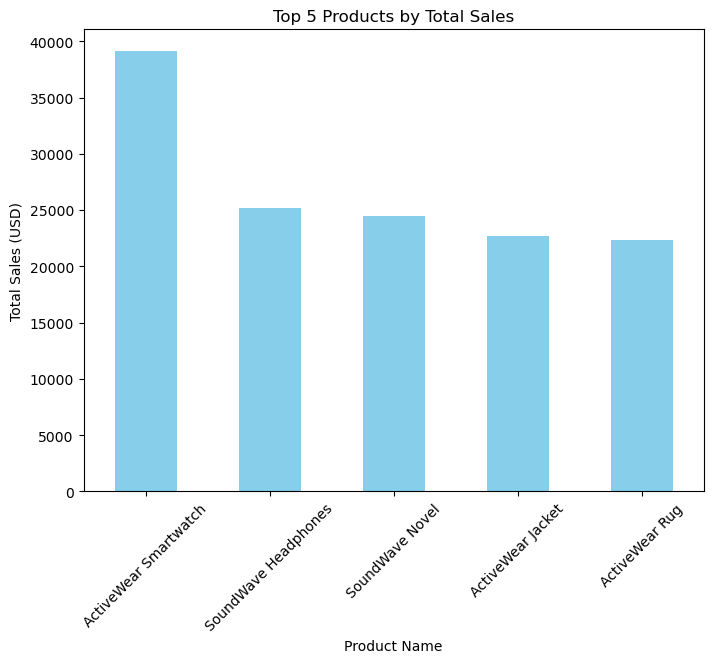

In [24]:
# Top 5 products by total sales
top_products = df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)

print("Top 5 Products by Total Sales:")
print(top_products)

# Visualization
plt.figure(figsize=(8, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 5 Products by Total Sales")
plt.ylabel("Total Sales (USD)")
plt.xlabel("Product Name")
plt.xticks(rotation=45)
plt.show()

Total Sales by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


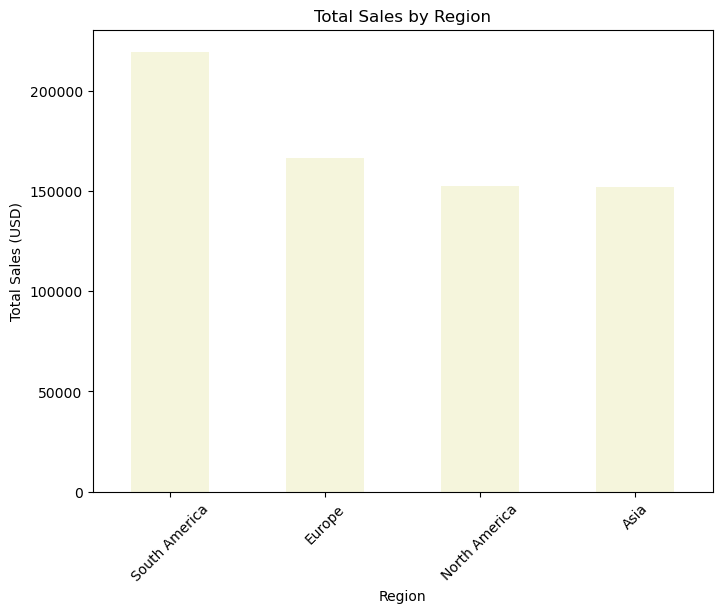

In [34]:
# Total sales by region
sales_by_region = df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

print("Total Sales by Region:")
print(sales_by_region)

# Visualization
plt.figure(figsize=(8, 6))
sales_by_region.plot(kind='bar', color='beige')
plt.title("Total Sales by Region")
plt.ylabel("Total Sales (USD)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

Customer Signups by Month:
SignupMonth
1     15
2     21
3     20
4     24
5     17
6     12
7     13
8     10
9     21
10    15
11    19
12    13
dtype: int64


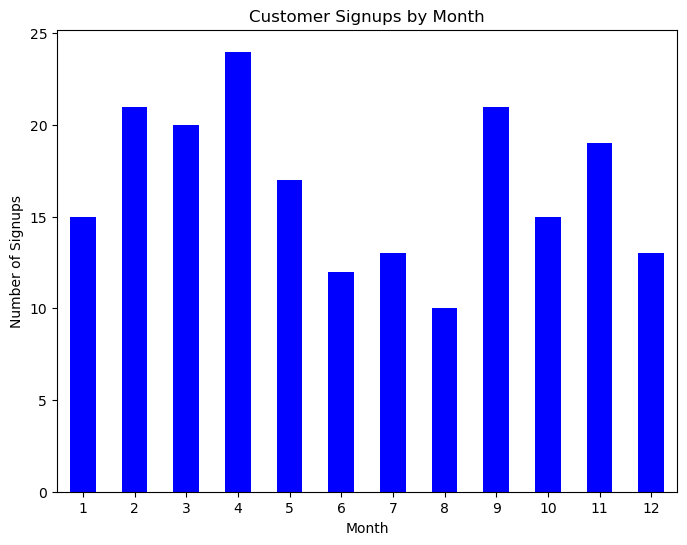

In [30]:
# Extract month of signup
customers_df['SignupMonth'] = customers_df['SignupDate'].dt.month
signups_by_month = customers_df.groupby('SignupMonth').size()

print("Customer Signups by Month:")
print(signups_by_month)

# Visualization
plt.figure(figsize=(8, 6))
signups_by_month.plot(kind='bar', color='blue')
plt.title("Customer Signups by Month")
plt.ylabel("Number of Signups")
plt.xlabel("Month")
plt.xticks(rotation=0)
plt.show()

Top 10% of customers contribute 19.11% of total revenue.


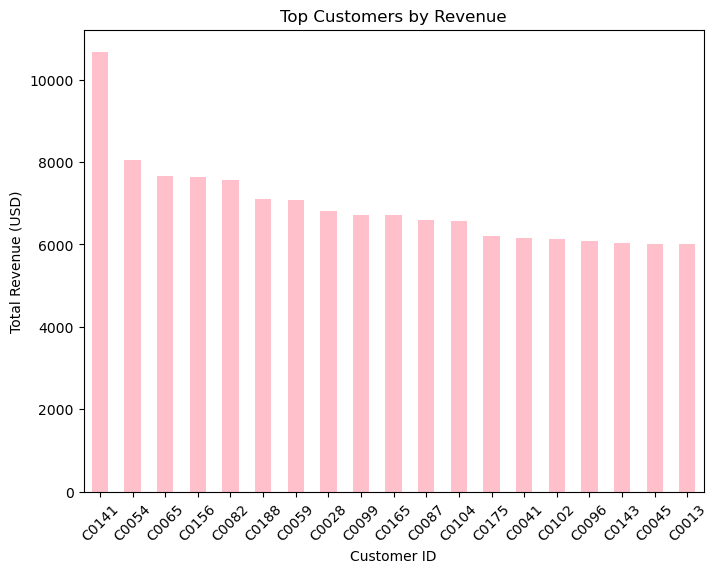

In [32]:
# Total revenue by customer
revenue_by_customer = df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)

# Percentage of total revenue from top 10% of customers
top_10_percent_customers = int(len(revenue_by_customer) * 0.1)
top_customers_revenue = revenue_by_customer.head(top_10_percent_customers).sum()
total_revenue = revenue_by_customer.sum()
revenue_percentage = (top_customers_revenue / total_revenue) * 100

print(f"Top 10% of customers contribute {revenue_percentage:.2f}% of total revenue.")

# Visualization
plt.figure(figsize=(8, 6))
revenue_by_customer.head(top_10_percent_customers).plot(kind='bar', color='pink')
plt.title("Top Customers by Revenue")
plt.ylabel("Total Revenue (USD)")
plt.xlabel("Customer ID")
plt.xticks(rotation=45)
plt.show()

Total Sales by Product Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


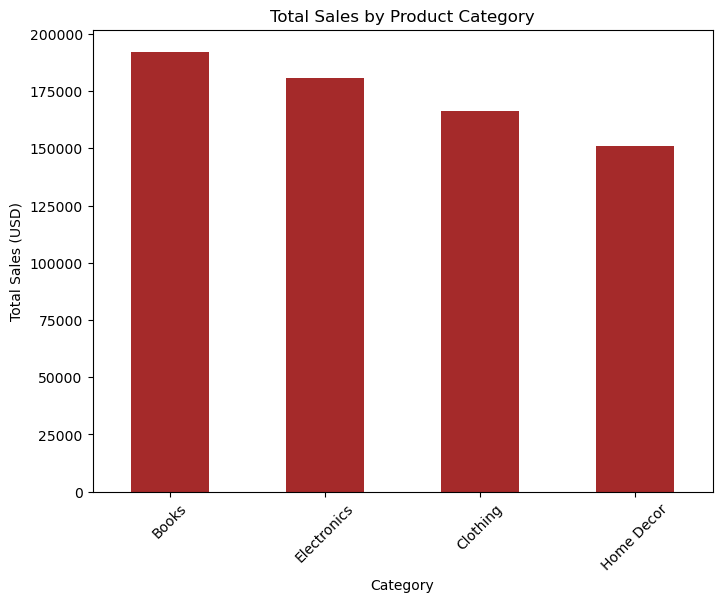

In [33]:
# Total sales by product category
sales_by_category = df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

print("Total Sales by Product Category:")
print(sales_by_category)

# Visualization
plt.figure(figsize=(8, 6))
sales_by_category.plot(kind='bar', color='brown')
plt.title("Total Sales by Product Category")
plt.ylabel("Total Sales (USD)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

1. **Best-Selling Products**: Identifies the top 5 products generating the highest revenue and presents a bar chart for visualization.

2. **Regional Sales Breakdown**: Summarizes total sales across regions and showcases the data using a bar chart.

3. **Customer Signup Patterns**: Displays monthly signup counts and trends through a bar chart.

4. **Top Customers' Contribution**: Examines the revenue share of the top 10% of customers and illustrates it with a bar chart.

5. **Sales by Product Category**: Evaluates total revenue for each product category and represents it through a bar chart.